<a href="https://colab.research.google.com/github/kimtaeyoon1/pdm05/blob/main/project/cifar10/cifar10_DL1_CNN_best_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    - > 2차원 필터로 영상을 대표하는 특징을 추출
    * FCN : 1차원 완전연결신경망
    - > Conv2D에서 추출된 대표 특징들을 이용하여 FCN으로 최종 학습 완료

***
- ## Traget: Find the best model
***

![cnn_c4f5.png](https://raw.githubusercontent.com/Redwoods/Py/master//pdm2020/my-note/py-tensorflow/images/cnn_c4f5.png)

### CIFAR-10 Dataset (CIFAR: Canadian Institute For Advanced Research)
> https://www.cs.toronto.edu/~kriz/cifar.html

- (50000, 32, 32, 3), train
- (10000, 32, 32, 3), test
- color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc
> class names
> - ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

- 참고 문헌  

> https://becominghuman.ai/cifar-10-image-classification-fd2ace47c5e8  

> https://becominghuman.ai/convolutional-neural-networks-cnns-convnets-for-visual-recognition-cae879a70f1a

> https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c

## Search the best model of C2F2
- callback
    - Early stopping
    - model checkpoint

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

tf.random.set_seed(0)

print(tf.__version__)

2.9.2


In [2]:
# import TF2 submodules
from tensorflow.keras import layers, models, callbacks

## **데이터 로딩, 정규화**

In [3]:
from keras.datasets import cifar10

(X_train0, y_train0), (X_test0, y_test0) = cifar10.load_data()

# Reshape
# X_train = X_train0.reshape(60000,28,28,1)
# X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train0/255.0, X_test0/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

170498071/170498071 [==============================] - 14s 0us/step
X_train=(50000, 32, 32, 3)
y_train=(50000, 1)
X_test=(10000, 32, 32, 3)
y_test=(10000, 1)


In [4]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((50000, 10), (10000, 10))

In [5]:
# y_train0.shape vs. y_train.shape
y_train0.shape, y_train.shape

((50000, 1), (50000, 10))

### Display images in CIFAR-10
- one random image
- 10 representative images

6734


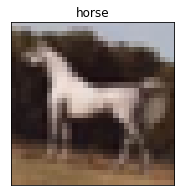

In [6]:
# Code here!
# display one random image from the training set:
class_names =  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

idx = np.random.randint(0, X_train0.shape[0])
print(idx)
image = X_train0[idx]
plt.figure(figsize=(3,3))
plt.imshow(image) #, cmap=plt.get_cmap('gray'))
plt.title(class_names[y_train0[idx][0]])
plt.xticks([])
plt.yticks([])
plt.show()

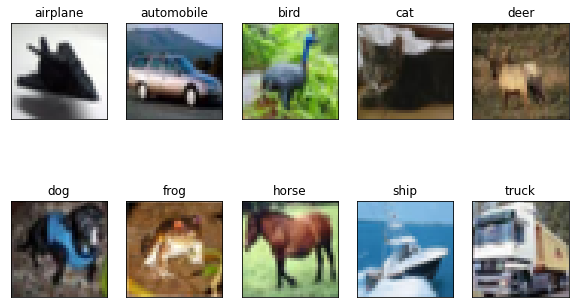

In [7]:
fig = plt.figure(figsize=(10,6))
num0_9 = np.unique(y_train0, return_index=True)[1]
images = X_train[num0_9]
for i in range(10):
    plt.subplot(2, 5, i+1)
    # num0_9 = X_train0[y_train0 == i]
    
    # print(num0_9.shape)
    # plt.imshow(num0_9[0]) 
    plt.imshow(images[i])
    plt.title(class_names[i])
    plt.xticks([])
    plt.yticks([])

# Design CNN

### import models, layers, callbacks
- models: Sequential
- layers: Conv2D, MaxPool2D, Flatten
- callbacks: ModelCheckpoint, EarlyStopping

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

## **CNN2 + FCN2**

In [12]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [15]:
c2f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(32,32,3), filters= 32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(filters= 64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [16]:
# 모델 구조 요약 - summary(), plot_model()
c2f2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 4096)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

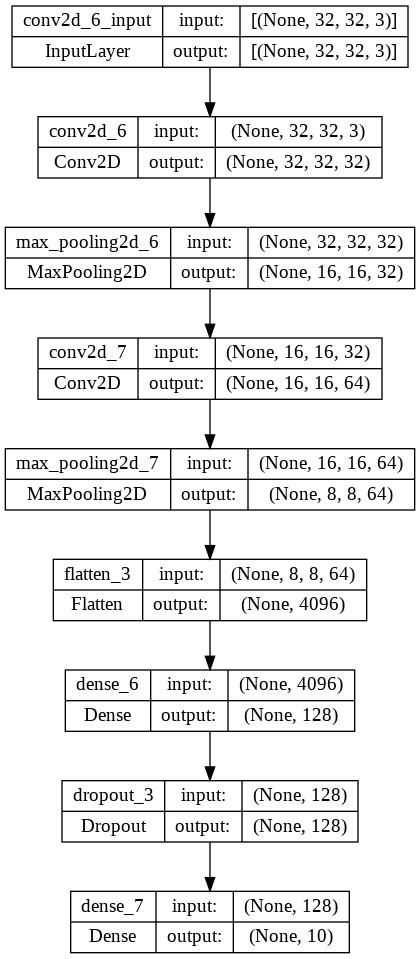

In [17]:
keras.utils.plot_model(c2f2, show_shapes=True)

In [20]:
# !pip install visualkeras

In [21]:
!fc-list

/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf: Liberation Sans Narrow:style=Italic
/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf: Liberation Sans:style=Regular
/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf: Liberation Mono:style=Bold Italic
/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf: Liberation Serif:style=Italic
/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf: Liberation Mono:style=Bold
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf: Liberation Sans Narrow:style=Regular
/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf: Liberation Serif:style=Bold
/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf: Liberation Mono:style=Regular
/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf: Liberation Sans:style=Italic
/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf: Liberation Serif:style=Bold Italic
/usr/share/fonts/truet

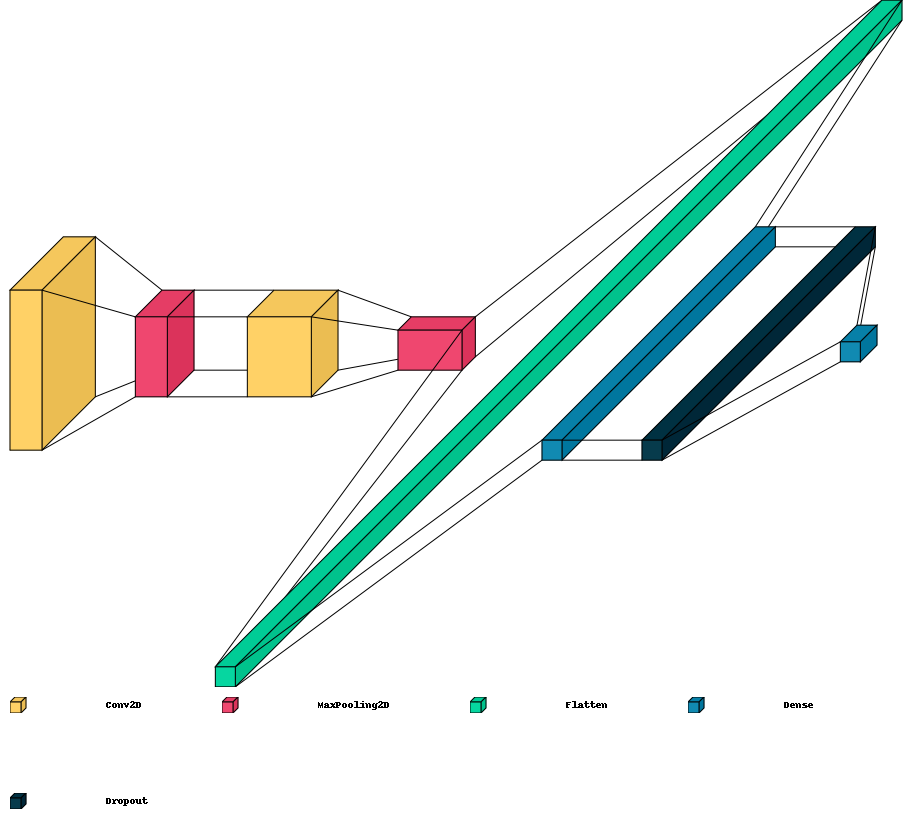

In [23]:
# 모델 구조 시각화 - visualkareas.layered_view()
import visualkeras
from PIL import ImageFont
font = ImageFont.truetype("Humor-Sans.ttf", 24)  # Linux
# font = ImageFont.truetype("arial.ttf", 24)  # windows 10/11
visualkeras.layered_view(c2f2, 
                         to_file='./c2f2.png', 
                         legend=True, spacing=80,  # font=font, 
                         scale_xy=5, scale_z=1, one_dim_orientation='x')

In [25]:
cp_callback = callbacks.ModelCheckpoint(filepath="./cifar10_c2f2_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=5)    # patience=10, 25, 50

In [26]:
BATCH_SIZE = 50  # cifar10
hist = c2f2.fit(X_train, y_train, epochs = 500 , batch_size = BATCH_SIZE, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
1000/1000 [==============================] - 14s 6ms/step - loss: 1.5252 - accuracy: 0.4486 - val_loss: 1.1648 - val_accuracy: 0.5815
Epoch 2/500
1000/1000 [==============================] - 4s 4ms/step - loss: 1.1593 - accuracy: 0.5882 - val_loss: 1.0095 - val_accuracy: 0.6405
Epoch 3/500
1000/1000 [==============================] - 4s 4ms/step - loss: 1.0164 - accuracy: 0.6417 - val_loss: 0.9430 - val_accuracy: 0.6649
Epoch 4/500
1000/1000 [==============================] - 4s 4ms/step - loss: 0.9240 - accuracy: 0.6745 - val_loss: 0.9253 - val_accuracy: 0.6678
Epoch 5/500
1000/1000 [==============================] - 5s 5ms/step - loss: 0.8616 - accuracy: 0.6963 - val_loss: 0.8578 - val_accuracy: 0.6971
Epoch 6/500
1000/1000 [==============================] - 5s 5ms/step - loss: 0.7941 - accuracy: 0.7190 - val_loss: 0.8783 - val_accuracy: 0.6982
Epoch 7/500
1000/1000 [==============================] - 4s 4ms/step - loss: 0.7441 - accuracy: 0.7346 - val_loss: 0.8390 - val_a

In [27]:
c2f2.evaluate(X_test, y_test, batch_size = BATCH_SIZE)

200/200 [==============================] - 1s 3ms/step - loss: 0.9924 - accuracy: 0.7149


[0.9923779368400574, 0.714900016784668]

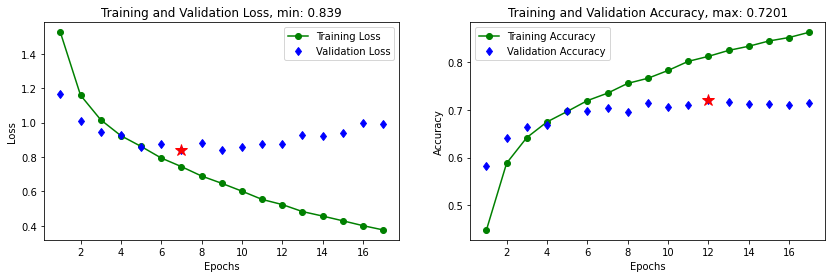

In [28]:
# More graphs of loss and accuracy
history_dict = hist.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Best c2f2 model of cifar10
- cifar10_c2f2_best_weights.012-0.7226.hdf5
- cifar10_c2f2_best_weights.013-0.7183.hdf5

## **CNN2 + FCN3**

In [29]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [30]:
c2f3 = keras.models.Sequential([ 
    Conv2D(input_shape=(32,32,3), filters= 32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(filters= 64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(64, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [31]:
c2f3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 4096)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

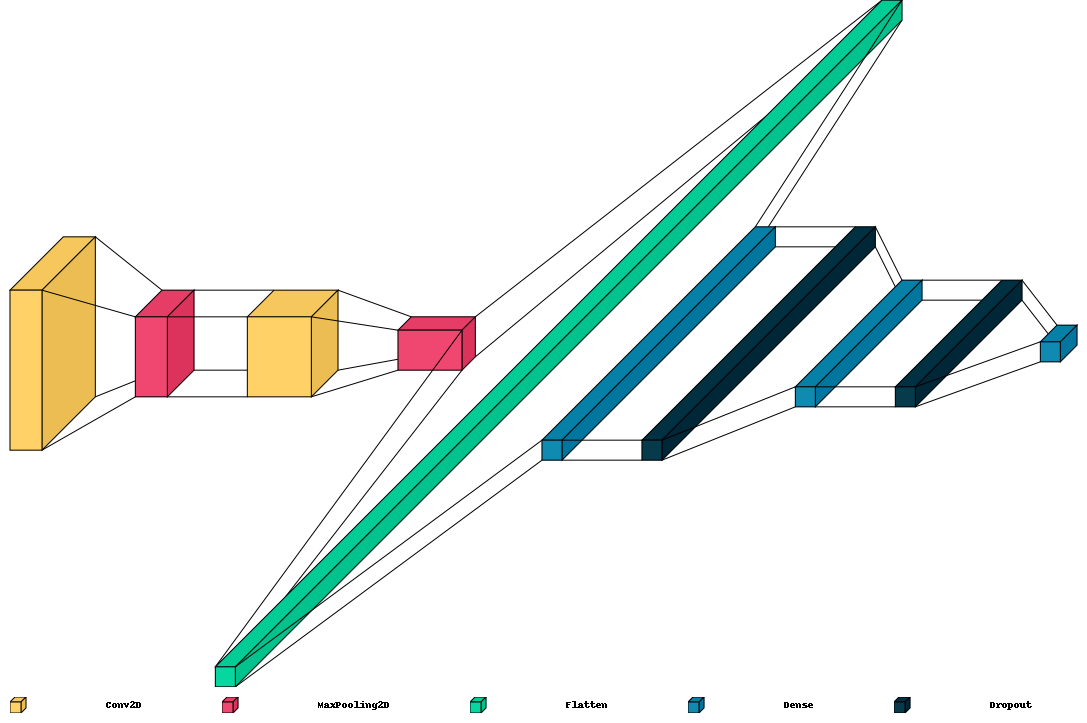

In [32]:
# 모델 구조 시각화 - visualkareas.layered_view()
import visualkeras
from PIL import ImageFont
# font = ImageFont.truetype("Humor-Sans.ttf", 24)  # Linux
# font = ImageFont.truetype("arial.ttf", 24)  # windows 10/11
visualkeras.layered_view(c2f3, 
                         to_file='./c2f3.png', 
                         legend=True, spacing=80,  # font=font, 
                         scale_xy=5, scale_z=1, one_dim_orientation='x')

In [33]:
cp_callback = callbacks.ModelCheckpoint(filepath="./cifar10_c2f3_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=5)    # patience=10, 25, 50

In [34]:
hist = c2f3.fit(X_train, y_train, epochs=500, batch_size = BATCH_SIZE, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
1000/1000 [==============================] - 5s 5ms/step - loss: 1.6144 - accuracy: 0.4049 - val_loss: 1.2145 - val_accuracy: 0.5664
Epoch 2/500
1000/1000 [==============================] - 5s 5ms/step - loss: 1.2426 - accuracy: 0.5553 - val_loss: 1.0470 - val_accuracy: 0.6275
Epoch 3/500
1000/1000 [==============================] - 4s 4ms/step - loss: 1.0869 - accuracy: 0.6186 - val_loss: 0.9785 - val_accuracy: 0.6557
Epoch 4/500
1000/1000 [==============================] - 5s 5ms/step - loss: 0.9880 - accuracy: 0.6536 - val_loss: 0.9098 - val_accuracy: 0.6837
Epoch 5/500
1000/1000 [==============================] - 4s 4ms/step - loss: 0.9095 - accuracy: 0.6832 - val_loss: 0.9398 - val_accuracy: 0.6730
Epoch 6/500
1000/1000 [==============================] - 5s 5ms/step - loss: 0.8451 - accuracy: 0.7057 - val_loss: 0.8662 - val_accuracy: 0.6973
Epoch 7/500
1000/1000 [==============================] - 5s 5ms/step - loss: 0.7869 - accuracy: 0.7244 - val_loss: 0.9072 - val_ac

In [35]:
 c2f3.evaluate(X_test, y_test, batch_size = BATCH_SIZE)

200/200 [==============================] - 1s 3ms/step - loss: 0.9951 - accuracy: 0.7109


[0.995061993598938, 0.7109000086784363]

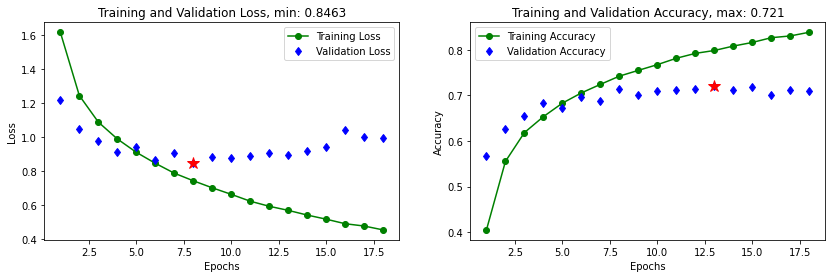

In [36]:
# More graphs of loss and accuracy
history_dict = hist.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Best c2f3 model of cifar10
- cifar10_c2f3_best_weights.013-0.7161.hdf5
- cifar10_c2f3_best_weights.011-0.7155.hdf5

# **[DIY] Hidden layer에 따른 정확도**

In [41]:
score1=c2f2.evaluate(X_test, y_test, batch_size = BATCH_SIZE)
score2=c2f3.evaluate(X_test, y_test, batch_size = BATCH_SIZE)
losses = [score1[0],score2[0]]
accuracies= [score1[1],score2[1]]
losses,accuracies

200/200 [==============================] - 1s 3ms/step - loss: 0.9951 - accuracy: 0.7109


([0.9923779368400574, 0.995061993598938],
 [0.714900016784668, 0.7109000086784363])

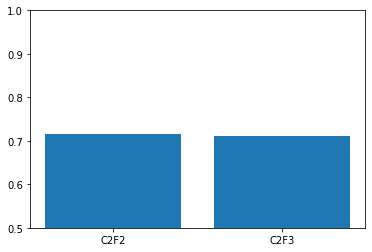

In [42]:
x = np.arange(2)
cnns = ['C2F2','C2F3']

plt.bar(x, accuracies)
plt.xticks(x, cnns)
plt.ylim((.5,1.0))
plt.show()

## Complex model
- C4F5 model

![cnn_c4f5.png](https://raw.githubusercontent.com/Redwoods/Py/master//pdm2020/my-note/py-tensorflow/images/cnn_c4f5.png)

In [43]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [44]:
c4f5 = keras.models.Sequential([ 
    Conv2D(input_shape=(32,32,3), filters= 64, kernel_size=(3,3),strides=(1,1), padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(filters= 128, kernel_size=(3,3), strides=(1,1), padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(filters= 256, kernel_size=(3,3), strides=(1,1), padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(filters= 512, kernel_size=(3,3), strides=(1,1), padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(256, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(512, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(1024, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c4f5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [45]:
c4f5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 4, 4, 256)       

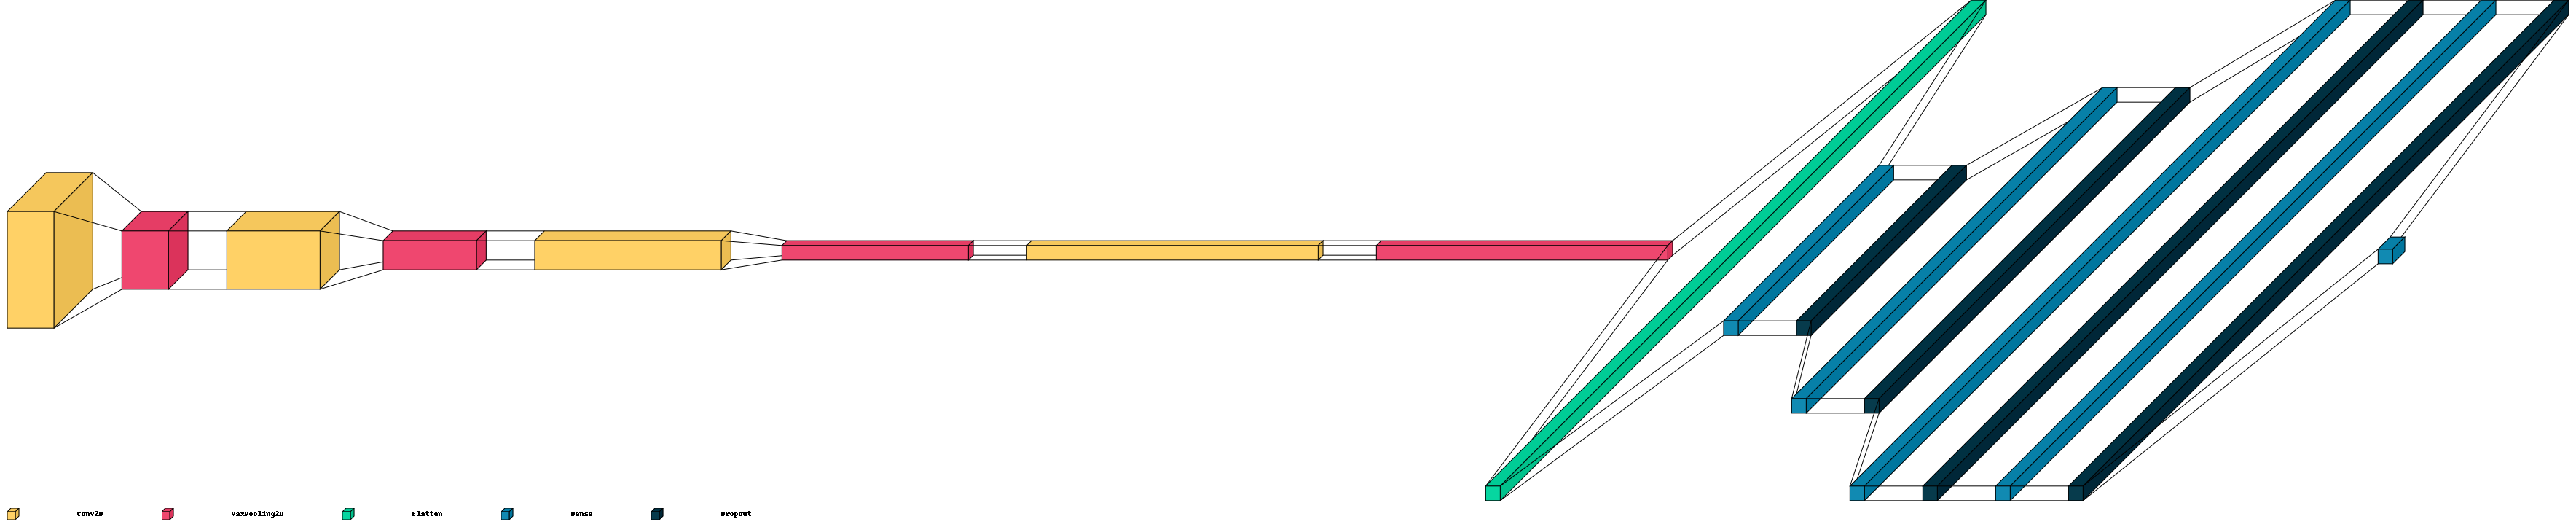

In [46]:
# 모델 구조 시각화 - visualkareas.layered_view()
import visualkeras
from PIL import ImageFont
font = ImageFont.truetype("Humor-Sans.ttf", 24)  # Linux
# font = ImageFont.truetype("arial.ttf", 24)  # windows 10/11
visualkeras.layered_view(c4f5, 
                         to_file='./c4f5.png', 
                         legend=True, spacing=80,  # font=font, 
                         scale_xy=5, scale_z=1, one_dim_orientation='x')

In [47]:
cp_callback = callbacks.ModelCheckpoint(filepath="./cifar10_c4f5_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=5)    # patience=10, 25, 50

In [48]:
hist = c4f5.fit(X_train, y_train, epochs=500, batch_size = BATCH_SIZE, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
1000/1000 [==============================] - 11s 10ms/step - loss: 1.6845 - accuracy: 0.3506 - val_loss: 1.3482 - val_accuracy: 0.4958
Epoch 2/500
1000/1000 [==============================] - 10s 10ms/step - loss: 1.2228 - accuracy: 0.5674 - val_loss: 1.1153 - val_accuracy: 0.6084
Epoch 3/500
1000/1000 [==============================] - 9s 9ms/step - loss: 0.9974 - accuracy: 0.6549 - val_loss: 0.9497 - val_accuracy: 0.6705
Epoch 4/500
1000/1000 [==============================] - 9s 9ms/step - loss: 0.8736 - accuracy: 0.7009 - val_loss: 0.8550 - val_accuracy: 0.7126
Epoch 5/500
1000/1000 [==============================] - 10s 10ms/step - loss: 0.7689 - accuracy: 0.7408 - val_loss: 0.9344 - val_accuracy: 0.6924
Epoch 6/500
1000/1000 [==============================] - 10s 10ms/step - loss: 0.6918 - accuracy: 0.7683 - val_loss: 0.8139 - val_accuracy: 0.7316
Epoch 7/500
1000/1000 [==============================] - 10s 10ms/step - loss: 0.6152 - accuracy: 0.7949 - val_loss: 0.848

In [49]:
 c4f5.evaluate(X_test, y_test, batch_size = BATCH_SIZE)

200/200 [==============================] - 2s 10ms/step - loss: 0.8957 - accuracy: 0.7460


[0.8956723809242249, 0.7459999918937683]

## Graph of loss and accuracy
- model: C4f5

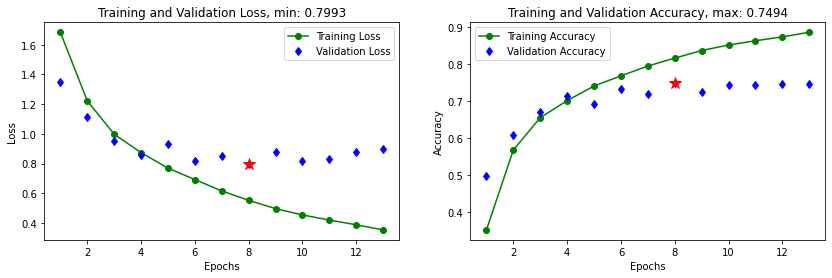

In [50]:
# More graphs of loss and accuracy
history_dict = hist.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Best c4f5 model of cifar10
- cifar10_c4f5_best_weights.010-0.7446.hdf5
- cifar10_c4f5_best_weights.012-0.7493.hdf5

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

## Best model
- cifar10_c4f5_best_weights.012-0.7493.hdf5

In [52]:
from keras.models import load_model

model_best = load_model('cifar10_c4f5_best_weights.008-0.7494.hdf5')
model_best.evaluate(X_test, y_test, batch_size=BATCH_SIZE)

200/200 [==============================] - 1s 4ms/step - loss: 0.7993 - accuracy: 0.7494


[0.7993257641792297, 0.7494000196456909]

## Confusion matrix

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [54]:
predictions = model_best.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [55]:
predictions0 = np.argmax(predictions, axis=1)
predictions0.shape

(10000,)

In [56]:
cm = confusion_matrix(y_test0, predictions0)

In [57]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

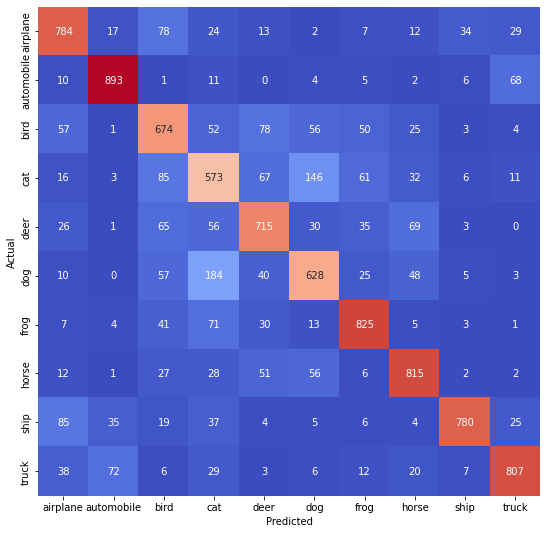

In [58]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=class_names, yticklabels=class_names, fmt='d', annot=True, cmap=plt.cm.coolwarm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## test of the best model

313/313 [==============================] - 1s 3ms/step
Test image-6626: Classified correctly


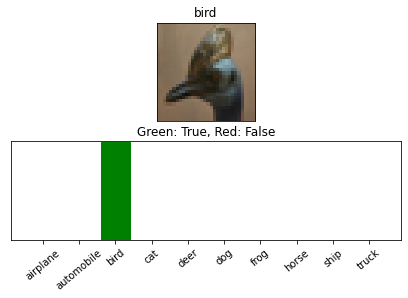

In [64]:
def plot_pred(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i:i+1], img[i]
    plt.grid(False)
    plt.title(class_names[true_label[0][0]])
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img) #np.squeeze(img, 2))

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:   # np.argmax(true_label)
       print("Test image-%d: Classified correctly" % i)
    else:
       print("Test image-%d: Wrong classification" % i)


def plot_bar(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.yticks([])
    plt.xticks(np.arange(10), class_names, rotation=40)

    thisplot = plt.bar(range(10), predictions_array, color='grey')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_label:  # np.argmax(true_label):
        color = 'green'
    else:
        color = 'red'

    thisplot[predicted_label].set_color(color)


predictions = model_best.predict(X_test)
np.random.seed(None)
num = np.random.randint(0, len(y_test0))

plt.figure(figsize=(7, 4))
plt.subplot(2, 2, (1, 2))
plot_pred(num, predictions, y_test0, X_test)
plt.subplot(2, 2, (3,4))
plot_bar(num, predictions,  y_test0)
plt.title("Green: True, Red: False")
plt.show()

Test image-646: Classified correctly


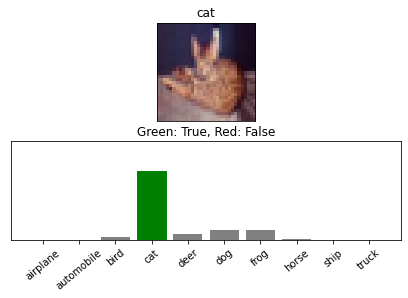

In [70]:
num = np.random.randint(0, len(y_test0))

plt.figure(figsize=(7, 4))
plt.subplot(2, 2, (1, 2))
plot_pred(num, predictions, y_test0, X_test)
plt.subplot(2, 2, (3,4))
plot_bar(num, predictions,  y_test0)
plt.title("Green: True, Red: False")
plt.show()

---

## cifar10 모델 학습
> https://gruuuuu.github.io/machine-learning/cifar10-cnn/#

# State of current scores of cifar-10

> https://paperswithcode.com/sota/image-classification-on-cifar-10

## Transfer learning on cifar-10

- https://medium.com/@andrew.dabydeen/transfer-learning-using-resnet50-and-cifar-10-6242ed4b4245

- https://medium.com/swlh/comparative-analysis-of-cifar-10-image-classification-transfer-learning-vs-user-defined-cnns-e673685d925e

- https://medium.com/swlh/hands-on-the-cifar-10-dataset-with-transfer-learning-2e768fd6c318

- https://medium.com/analytics-vidhya/the-transfer-learning-experience-with-vgg16-and-cifar-10-dataset-9b25b306a23f

---